# exploring-dataset
+ we're gonna use seaborn to look through the data and glean some info
+ going to try to derive meaningful equations for energy and dance (maybe a few for each) 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pprint
p = pprint.PrettyPrinter(indent=4)

import config as config

%matplotlib inline
%run utilities.py

In [2]:
%run utilities.py
util = Utilities({}, use_json=False)

# Get data points (m = 4k)
master_DF = util.get_master_dataframe()

## meta-data features
+ the artist_x ones already have good correlation

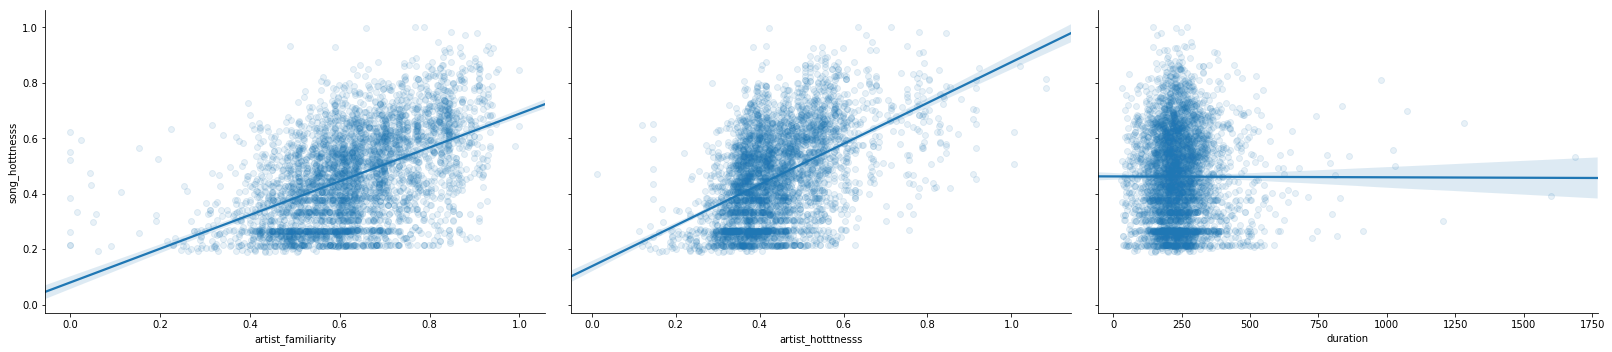

In [3]:
sns.pairplot(master_DF, x_vars=['artist_familiarity', 'artist_hotttnesss', 'duration'], 
             y_vars='song_hotttnesss', height=5, aspect=1.5, kind='reg',  plot_kws={'scatter_kws': {'alpha': 0.1}})

## acoustic features
+ very poor correlation in these

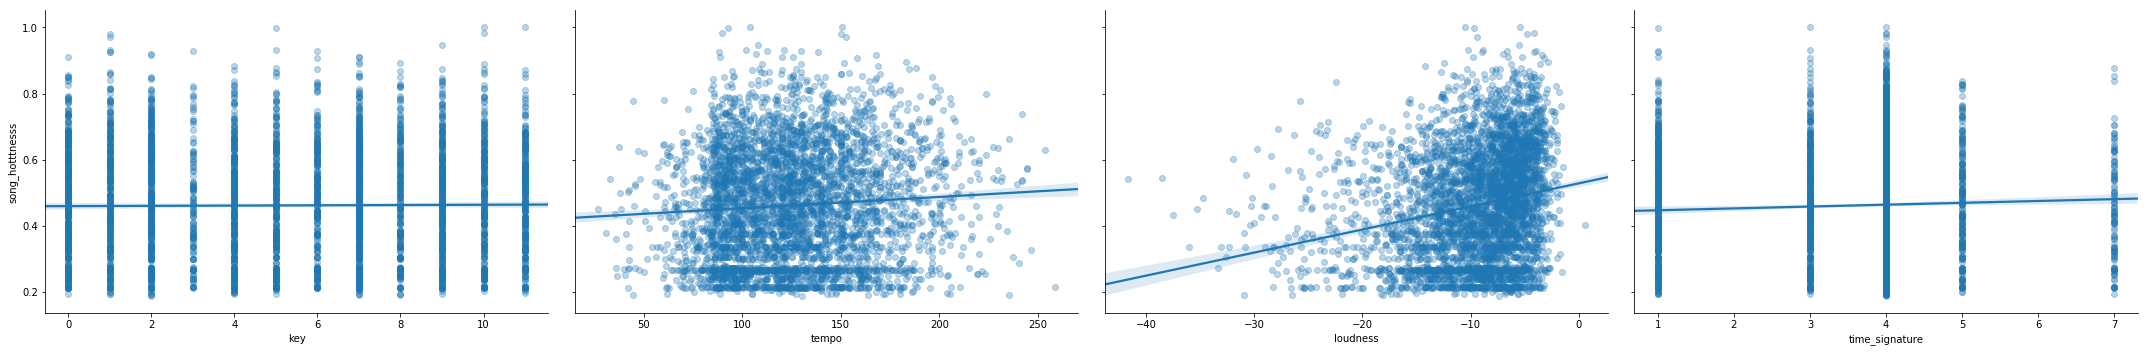

In [4]:
# The raw acoustic features 
sns.pairplot(master_DF, x_vars=['key', 'tempo', 'loudness', 'time_signature'], 
             y_vars='song_hotttnesss', height=5, aspect=1.5, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})

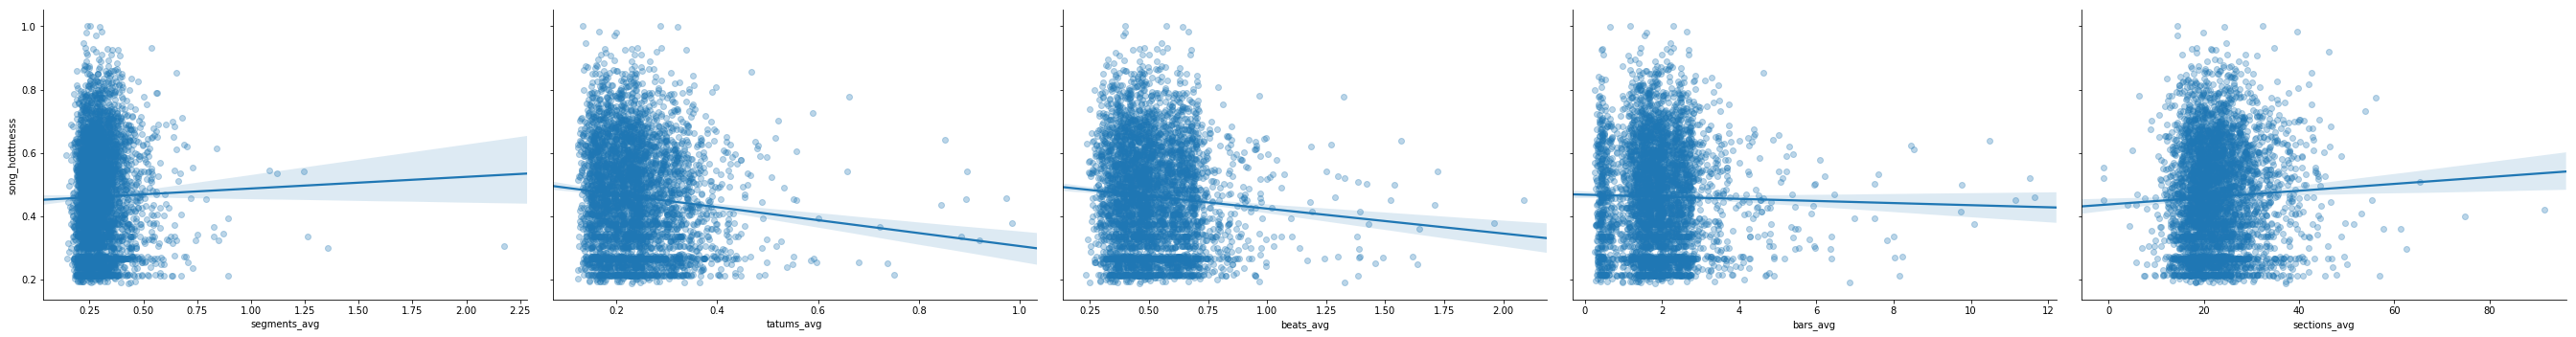

In [5]:
# all the interval averages
sns.pairplot(master_DF, x_vars=['segments_avg', 'tatums_avg', 'beats_avg', 'bars_avg', 'sections_avg'], 
             y_vars='song_hotttnesss', height=5, aspect=1.5, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})

# Feature engineering 

## Experimenting with new feature: ENERGY
`energy`:  The feature mix we use to compute energy includes loudness and segment durations.


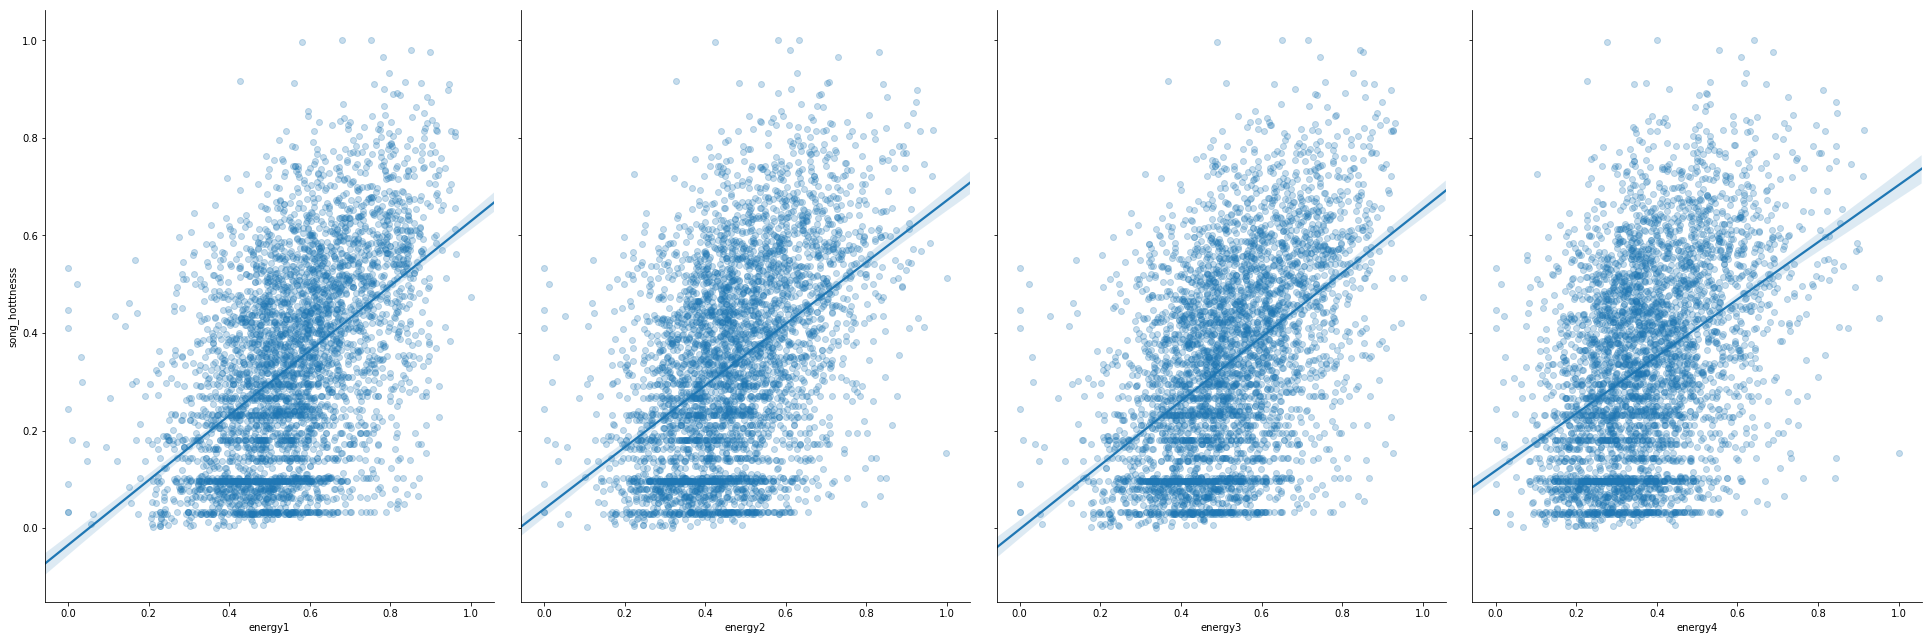

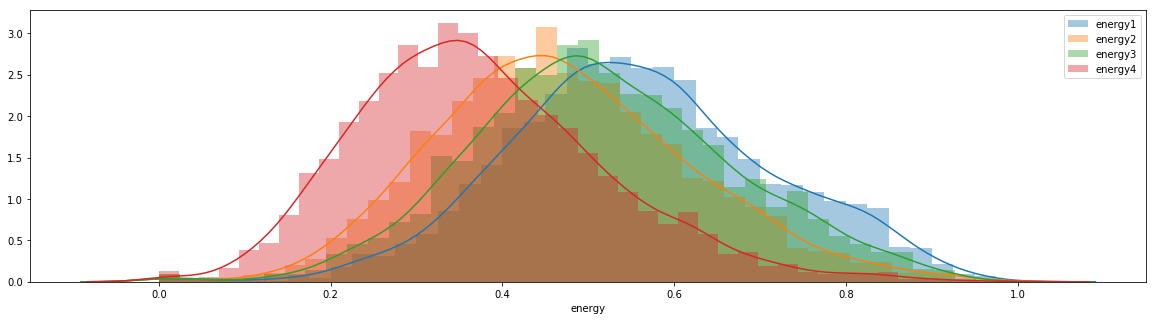

In [6]:
%run utilities.py
util = Utilities({}, use_json=False)

# loudness = training_DF['loudness']
# tempo = training_DF['tempo']
# time_sig = training_DF['time_signature']
# sections_avg = training_DF['sections_avg']
# beats_avg = training_DF['beats_avg']
# tatums_avg = training_DF['tatums_avg']
# training_DF['energy1'] = (50+loudness)**2*(12-time_sig)/1000
# training_DF['energy2'] = (50+loudness)**2*(12-time_sig)/(5000*beats_avg)
# training_DF['energy3'] = (50+loudness)**2*(12-time_sig)/(10000*tatums_avg)
# training_DF['energy4'] = (50+loudness)**2*(12-time_sig)/(50000*tatums_avg*beats_avg)

master_DF = util.generate_energy_measure(master_DF)

# normalize features  
normalized_energy_DF = util.normalize_numeric_columns(master_DF)


sns.pairplot(normalized_energy_DF, x_vars=['energy1', 'energy2', 'energy3', 'energy4'], 
# sns.pairplot(training_DF, x_vars=['energy'], 
    y_vars='song_hotttnesss', height=9, aspect=.75, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.25}})

# Trying to figure out which energy is better to use... 5
plt.subplots(figsize=(20,5))

energyplt = sns.distplot(normalized_energy_DF['energy1'], label='energy1', )
energyplt = sns.distplot(normalized_energy_DF['energy2'], label='energy2')
energyplt = sns.distplot(normalized_energy_DF['energy3'], label='energy3')
energyplt = sns.distplot(normalized_energy_DF['energy4'], label='energy4', axlabel='energy')

energyplt.legend()

## Experimenting with new feature: DANCE
`danceability`: We use a mix of features to compute danceability, including beat strength, tempo stability, overall tempo, and more.

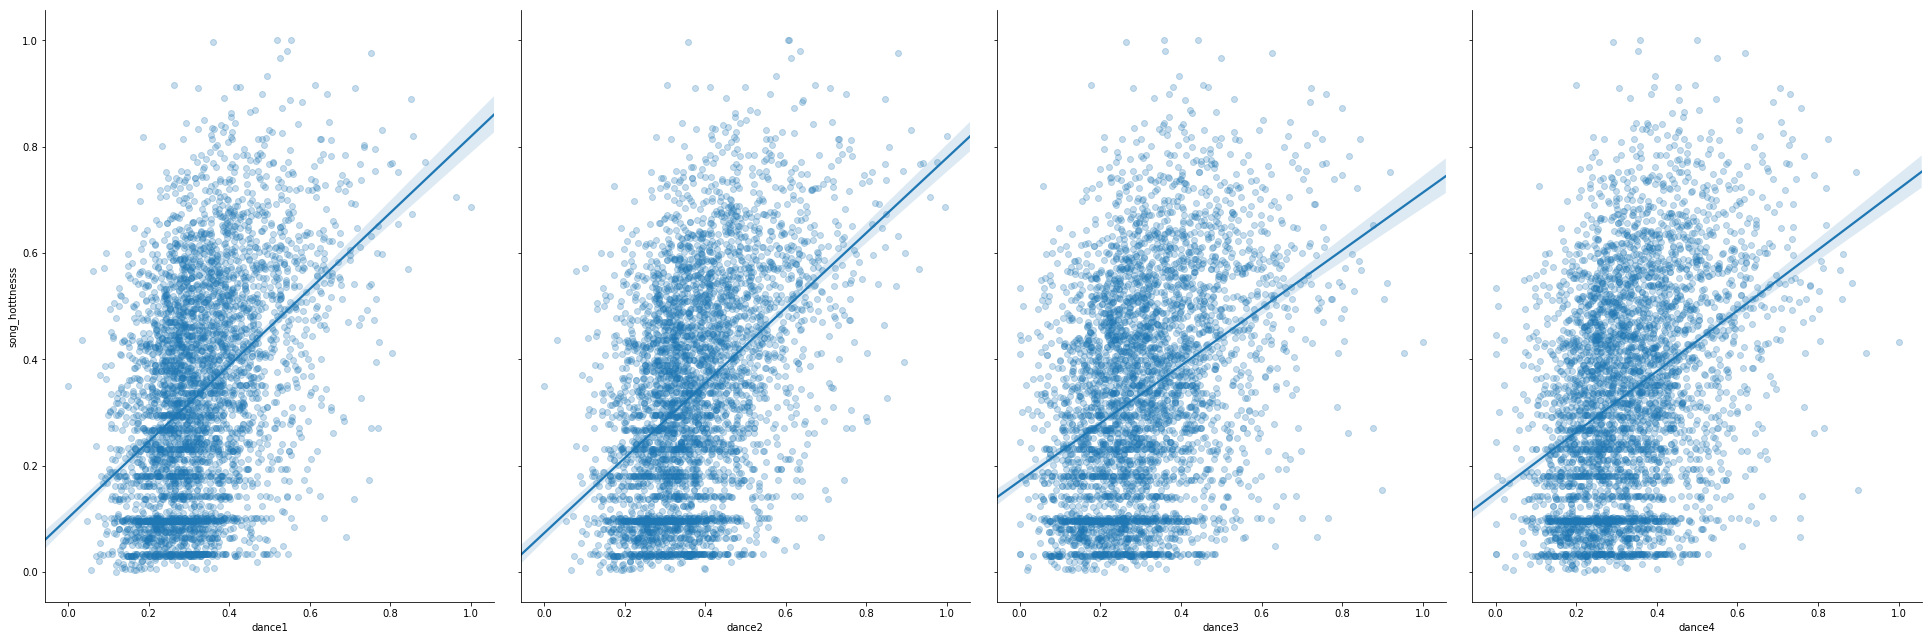

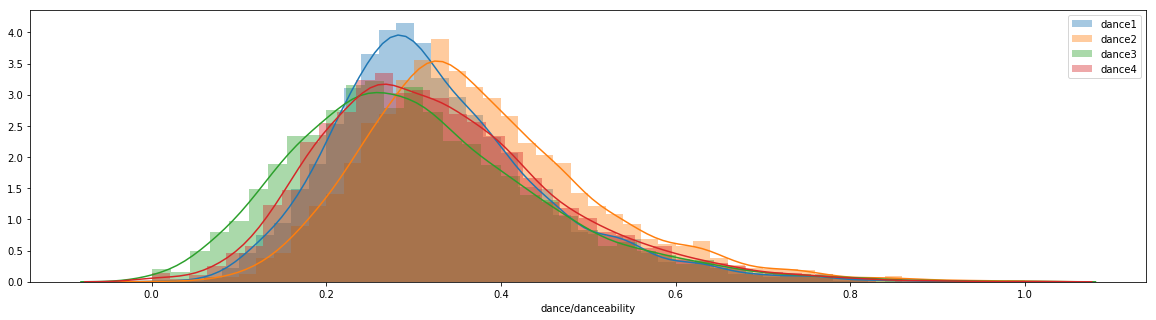

In [7]:

%run utilities.py
util = Utilities({}, use_json=False)

master_DF = util.generate_dance_measure(master_DF)

# normalize features  
normalized_dance_DF = util.normalize_numeric_columns(master_DF)

sns.pairplot(normalized_dance_DF, x_vars=['dance1', 'dance2', 'dance3', 'dance4'], 
# sns.pairplot(training_DF, x_vars=['energy'], 
    y_vars='song_hotttnesss', height=9, aspect=.75,  kind='reg',plot_kws={'scatter_kws': {'alpha': 0.25}})

# Trying to figure out which energy is better to use... 
plt.subplots(figsize=(20,5))

dance = sns.distplot(normalized_dance_DF['dance1'], label='dance1', )
dance = sns.distplot(normalized_dance_DF['dance2'],  label='dance2')
dance = sns.distplot(normalized_dance_DF['dance3'],  label='dance3')
dance = sns.distplot(normalized_dance_DF['dance4'],  label='dance4', axlabel='dance/danceability')

dance.legend()